In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Unemployment in India.csv")

In [4]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head

<bound method NDFrame.head of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN  

In [6]:
df.shape

(768, 7)

In [7]:
df.describe

<bound method NDFrame.describe of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               N

In [8]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
# Explore and preprocess the data
# Check for missing values
print(df.isnull().sum())


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [12]:
# Handle missing values if any
# df = df.dropna()

In [15]:
# Convert Date column to datetime type
df[' Date'] = pd.to_datetime(df[' Date'])

In [16]:
# Analyze the impact of Covid-19 on unemployment
# Filter data for the Covid-19 period
covid_period = (df[' Date'] >= '2020-01-01') & (df[' Date'] <= '2022-12-31')
df_covid = df[covid_period]

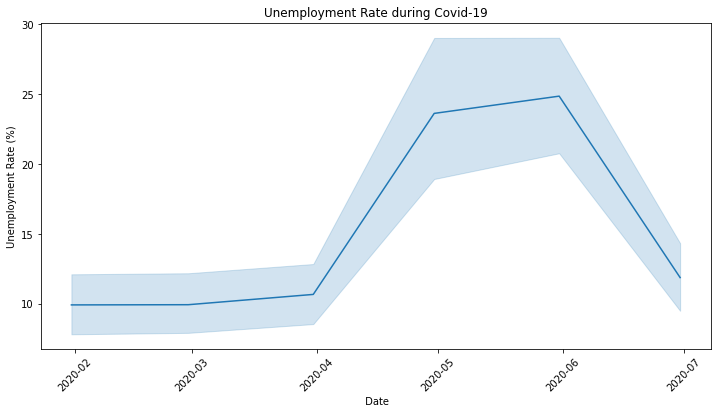

In [18]:
# Plot time series of unemployment rate
plt.figure(figsize=(12, 6))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df_covid)
plt.title("Unemployment Rate during Covid-19")
plt.xlabel(" Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()

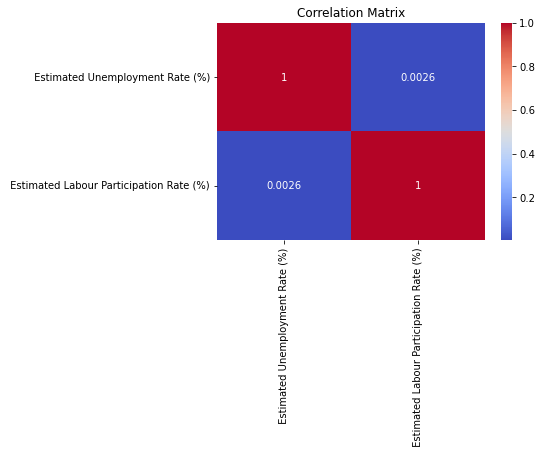

In [20]:
# Analyze the impact of other factors on unemployment rate
# Plot a correlation matrix
corr_matrix = df[[' Estimated Unemployment Rate (%)', ' Frequency', ' Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [21]:
# Draw conclusions and make recommendations based on the analysis

# Calculate the average unemployment rate during the Covid-19 period
avg_unemployment_rate = df_covid[' Estimated Unemployment Rate (%)'].mean()
print("Average Unemployment Rate during Covid-19: {:.2f}%".format(avg_unemployment_rate))

Average Unemployment Rate during Covid-19: 15.10%


In [23]:
# Identify regions most affected by unemployment
most_affected_regions = df_covid.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
print("Most Affected Regions by Unemployment during Covid-19:")
print(most_affected_regions)

Most Affected Regions by Unemployment during Covid-19:
Region
Haryana             30.929167
Jharkhand           29.053333
Tripura             28.333333
Bihar               25.632500
Puducherry          23.840000
Delhi               20.155000
Himachal Pradesh    17.841667
Tamil Nadu          17.578333
Rajasthan           16.400833
Chandigarh          16.330000
Jammu & Kashmir     16.251111
Uttar Pradesh       14.769167
Kerala              14.114167
Punjab              13.562500
Telangana           12.567500
Chhattisgarh        11.765000
Karnataka           11.259167
Andhra Pradesh      11.010833
Madhya Pradesh      10.897500
Maharashtra         10.355000
West Bengal         10.123333
Goa                  9.130000
Sikkim               9.068333
Gujarat              8.910000
Odisha               8.320000
Uttarakhand          7.720909
Assam                6.438182
Meghalaya            5.942727
Name:  Estimated Unemployment Rate (%), dtype: float64


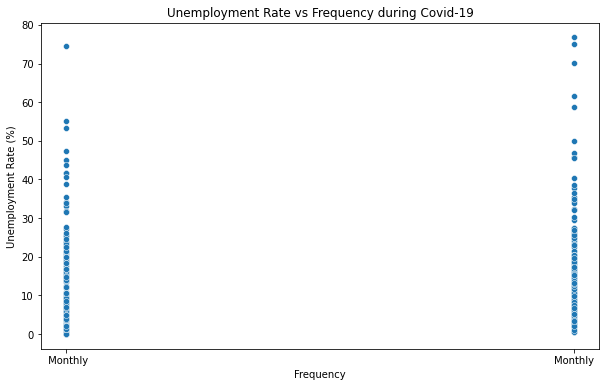

In [24]:
# Analyze the impact of frequency and labor participation rate on unemployment
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Frequency', y=' Estimated Unemployment Rate (%)', data=df_covid)
plt.title("Unemployment Rate vs Frequency during Covid-19")
plt.xlabel("Frequency")
plt.ylabel("Unemployment Rate (%)")
plt.show()

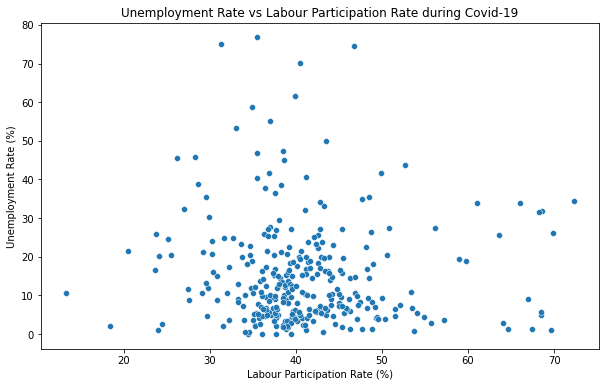

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Estimated Labour Participation Rate (%)', y=' Estimated Unemployment Rate (%)', data=df_covid)
plt.title("Unemployment Rate vs Labour Participation Rate during Covid-19")
plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.show()

In [30]:
# Provide recommendations based on the analysis

In [31]:
# Provide recommendations
print("Recommendations:")
print("- Monitor and support the regions with the highest unemployment rates during the Covid-19 pandemic.")
print("- Increase the frequency of employment-related initiatives to mitigate the impact of unemployment.")
print("- Encourage higher labor participation rates through targeted programs and incentives.")
print("- Continuously analyze and adjust policies to address the changing unemployment dynamics during the pandemic.")
print("- Explore collaborations with local businesses and industries to create job opportunities and boost employment.")
print("- Invest in re-skilling and upskilling programs to enhance the employability of the workforce.")
print("- Implement measures to promote entrepreneurship and self-employment, providing alternative avenues for income generation.")
print("- Strengthen social safety nets to support individuals and families affected by unemployment.")
print("- Foster innovation and technology adoption to drive job creation and economic recovery.")
print("- Enhance communication and coordination between government, industries, and educational institutions to align skill development with market needs.")
print("- Promote diversity and inclusion in the workforce, ensuring equal opportunities for all individuals.")

Recommendations:
- Monitor and support the regions with the highest unemployment rates during the Covid-19 pandemic.
- Increase the frequency of employment-related initiatives to mitigate the impact of unemployment.
- Encourage higher labor participation rates through targeted programs and incentives.
- Continuously analyze and adjust policies to address the changing unemployment dynamics during the pandemic.
- Explore collaborations with local businesses and industries to create job opportunities and boost employment.
- Invest in re-skilling and upskilling programs to enhance the employability of the workforce.
- Implement measures to promote entrepreneurship and self-employment, providing alternative avenues for income generation.
- Strengthen social safety nets to support individuals and families affected by unemployment.
- Foster innovation and technology adoption to drive job creation and economic recovery.
- Enhance communication and coordination between government, industries, a